In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
DATA=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [3]:
df=DATA

In [4]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
df.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df.shape

(614, 13)

In [7]:
df.columns.to_list()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### the data set contain 614 rows and 13 columns
### 4 columns flote type 1 is int data type and rest are object data type 
### loan_status is our target variable [lebal] wich is calssification problem.
### where loan_id is the unique identification for every costomar wich is no use for us
### we fond null values in data set
### by obsarving all columns we find the Dependents columns has wrong data type its 'int' but its showing object

In [9]:
df.drop('Loan_ID',axis=1,inplace=True)

In [10]:
df['Dependents'] = df['Dependents'].replace('3+', 4)


In [11]:
df['Dependents'] = df['Dependents'].astype(int)
# this code is not working becouse of null values present we fix null value then run this code

ValueError: cannot convert float NaN to integer

In [15]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

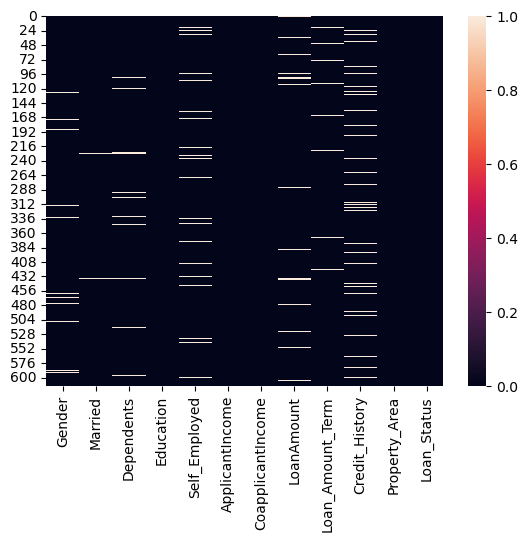

In [16]:
sns.heatmap(df.isnull(),color='r')

In [17]:
df['Gender'].fillna('MALE',inplace=True)
df['Married'].fillna('Yes',inplace=True)
df['Dependents'].fillna('0',inplace=True)          # 0 is mode of the column 
df['Self_Employed'].fillna('No',inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)

In [18]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
df['Dependents'] = df['Dependents'].astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 55.3+ KB


### problem of null values and wrong data type has been resolve

In [21]:
df.nunique()

Gender                 3
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

<Axes: >

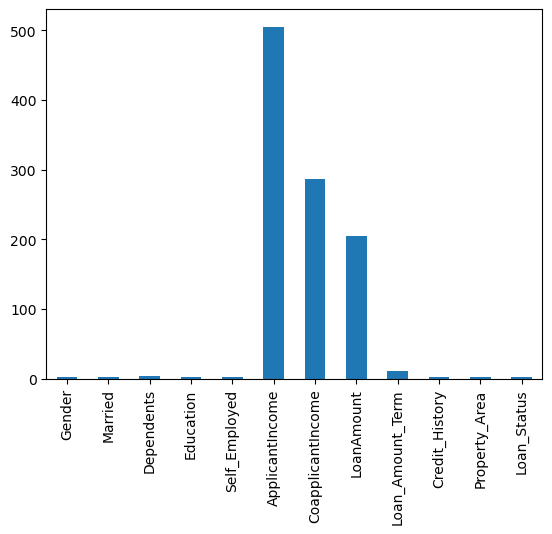

In [22]:
df.nunique().plot(kind='bar')

In [23]:
for i in df.columns:
    print(df[i].value_counts())
    print('/n'*45)

Male      489
Female    112
MALE       13
Name: Gender, dtype: int64
/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n
Yes    401
No     213
Name: Married, dtype: int64
/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n
0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64
/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n
No     532
Yes     82
Name: Self_Employed, dtype: int64
/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n

### all unique values as par respected columns

In [24]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.827362,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,1.212833,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,4.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


## obsarvation 
### ApplicantIncome ,CoapplicantIncome ,LoanAmount columns has high mean value then median(50%) = positive skewed
### Loan_Amount_Term , Credit_History has high median (50%) value then median = negative skewed 
### ApplicantIncome ,CoapplicantIncome ,LoanAmount ,Loan_Amount_Term has high max value then 75% value = have some outliers 

In [25]:
df.skew()            

Dependents           1.456965
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

# EDA

### lets try to see the class embalene with univariate anlysis.

<Axes: xlabel='Loan_Status', ylabel='count'>

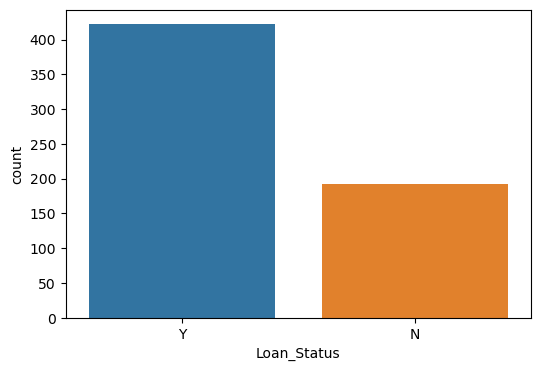

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x='Loan_Status',data=df)

### we have some class embalence broblem in our label column 

<Axes: xlabel='Gender', ylabel='count'>

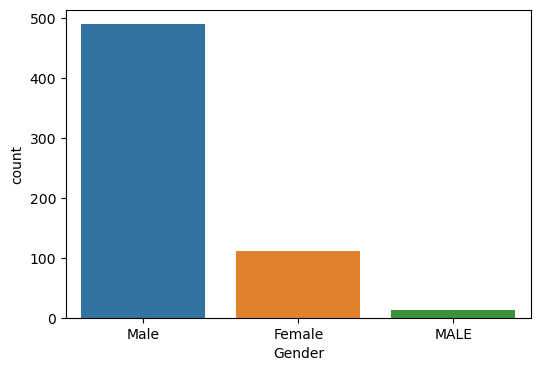

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender',data=df)

<Axes: xlabel='Married', ylabel='count'>

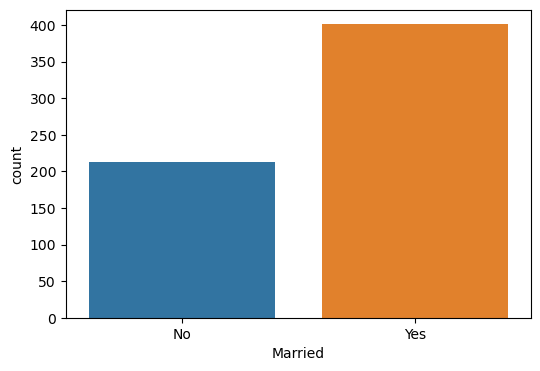

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(x='Married',data=df)

<Axes: xlabel='Education', ylabel='count'>

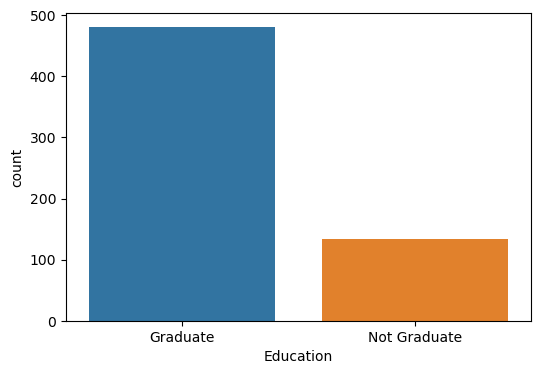

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(x='Education',data=df)

<Axes: xlabel='Self_Employed', ylabel='count'>

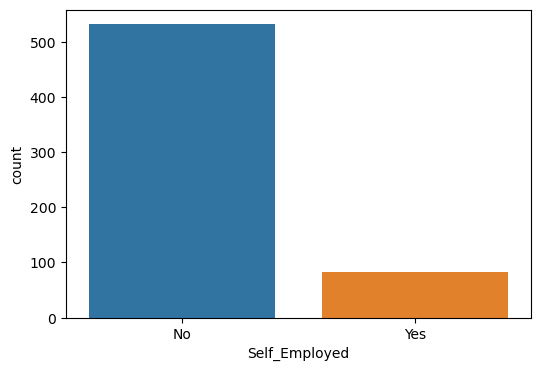

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(x='Self_Employed',data=df)

<Axes: xlabel='Property_Area', ylabel='count'>

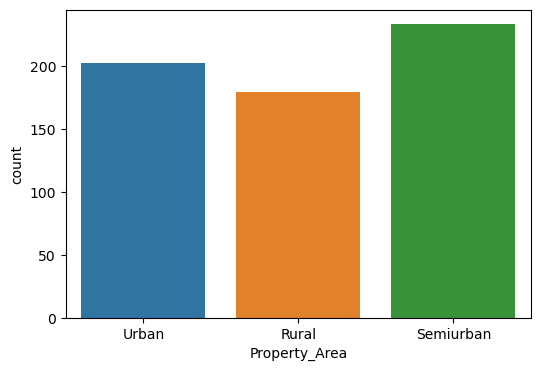

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(x='Property_Area',data=df)

# biverat anlysis

<Figure size 800x500 with 0 Axes>

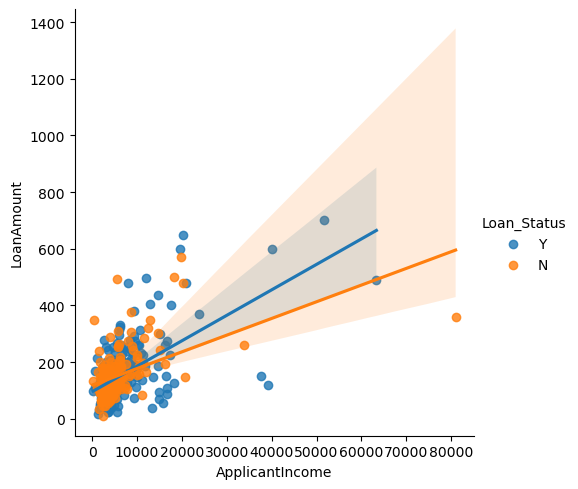

In [32]:
plt.figure(figsize=(8,5))
sns.lmplot(x='ApplicantIncome',y='LoanAmount',hue='Loan_Status',data=df)

<Figure size 800x500 with 0 Axes>

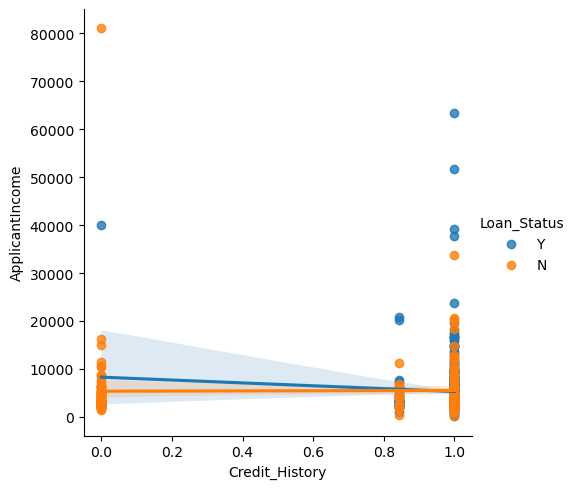

In [33]:
plt.figure(figsize=(8,5))
sns.lmplot(x='Credit_History',y='ApplicantIncome',hue='Loan_Status',data=df)

<Figure size 800x500 with 0 Axes>

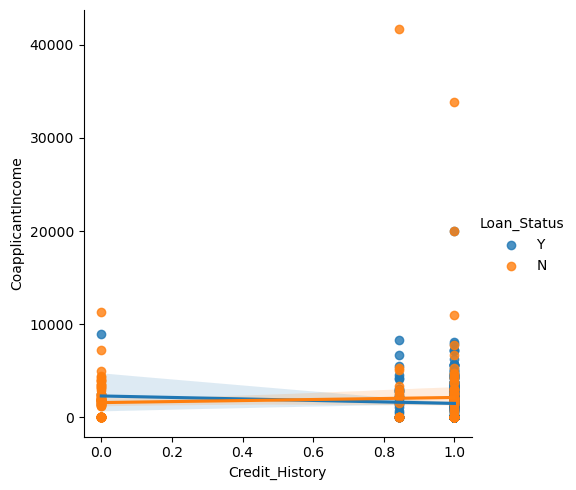

In [34]:
plt.figure(figsize=(8,5))
sns.lmplot(x='Credit_History',y='CoapplicantIncome',hue='Loan_Status',data=df)

<Figure size 800x500 with 0 Axes>

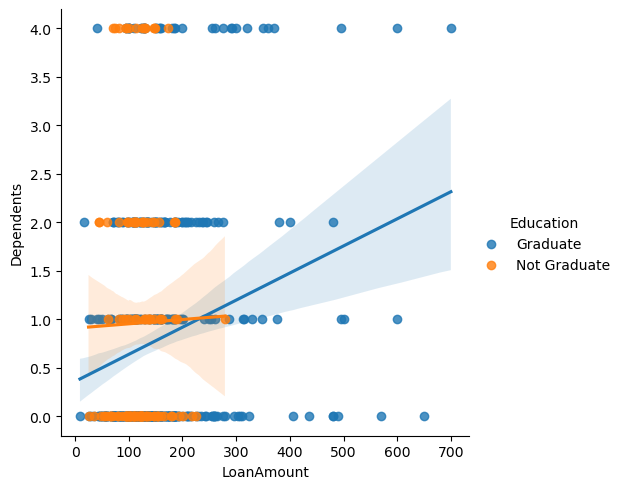

In [35]:
plt.figure(figsize=(8,5))
sns.lmplot(x='LoanAmount',y='Dependents',hue='Education',data=df)

<Figure size 800x500 with 0 Axes>

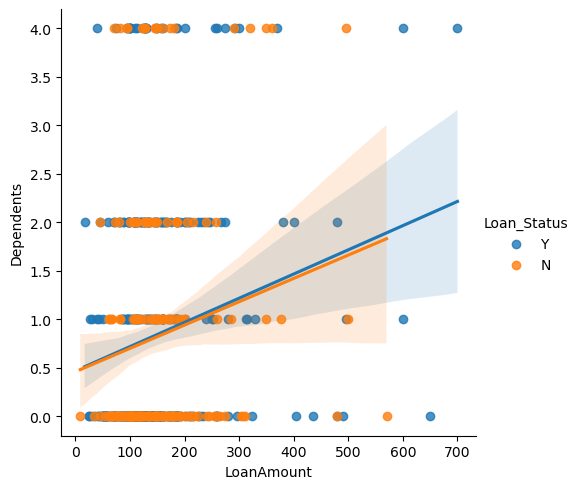

In [36]:
plt.figure(figsize=(8,5))
sns.lmplot(x='LoanAmount',y='Dependents',hue='Loan_Status',data=df)

<Figure size 800x500 with 0 Axes>

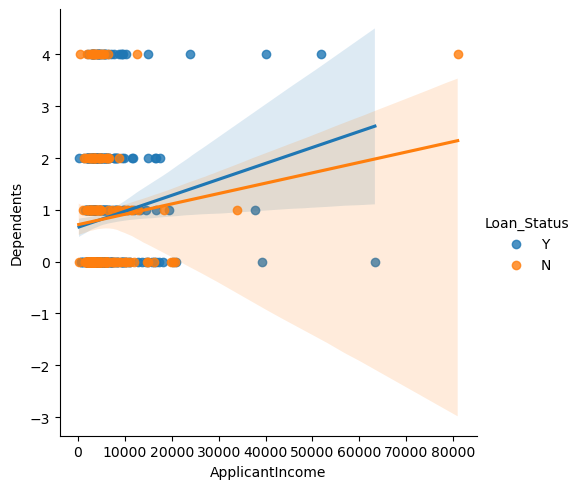

In [37]:
plt.figure(figsize=(8,5))
sns.lmplot(x='ApplicantIncome',y='Dependents',hue='Loan_Status',data=df)

<Figure size 800x500 with 0 Axes>

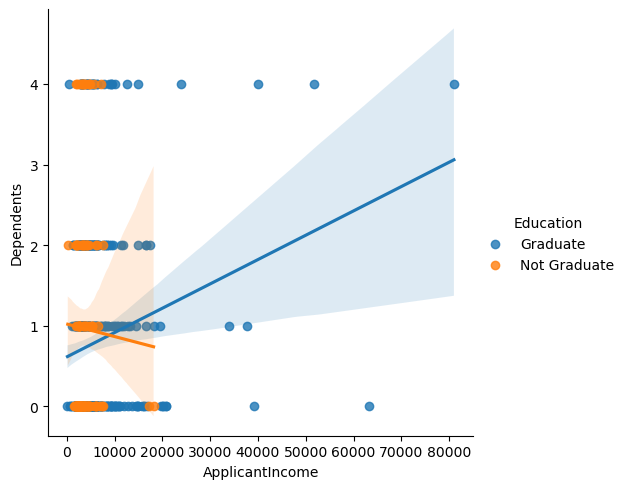

In [38]:
plt.figure(figsize=(8,5))
sns.lmplot(x='ApplicantIncome',y='Dependents',hue='Education',data=df)

<Figure size 800x500 with 0 Axes>

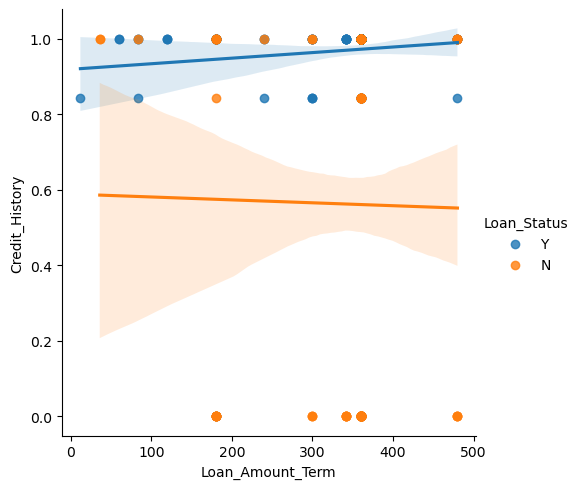

In [39]:
plt.figure(figsize=(8,5))
sns.lmplot(x='Loan_Amount_Term',y='Credit_History',hue='Loan_Status',data=df)

<Figure size 800x500 with 0 Axes>

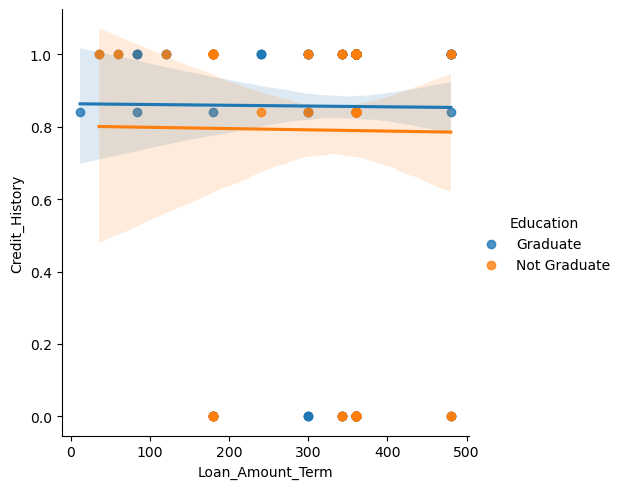

In [40]:
plt.figure(figsize=(8,5))
sns.lmplot(x='Loan_Amount_Term',y='Credit_History',hue='Education',data=df)

# multyverate anlysis

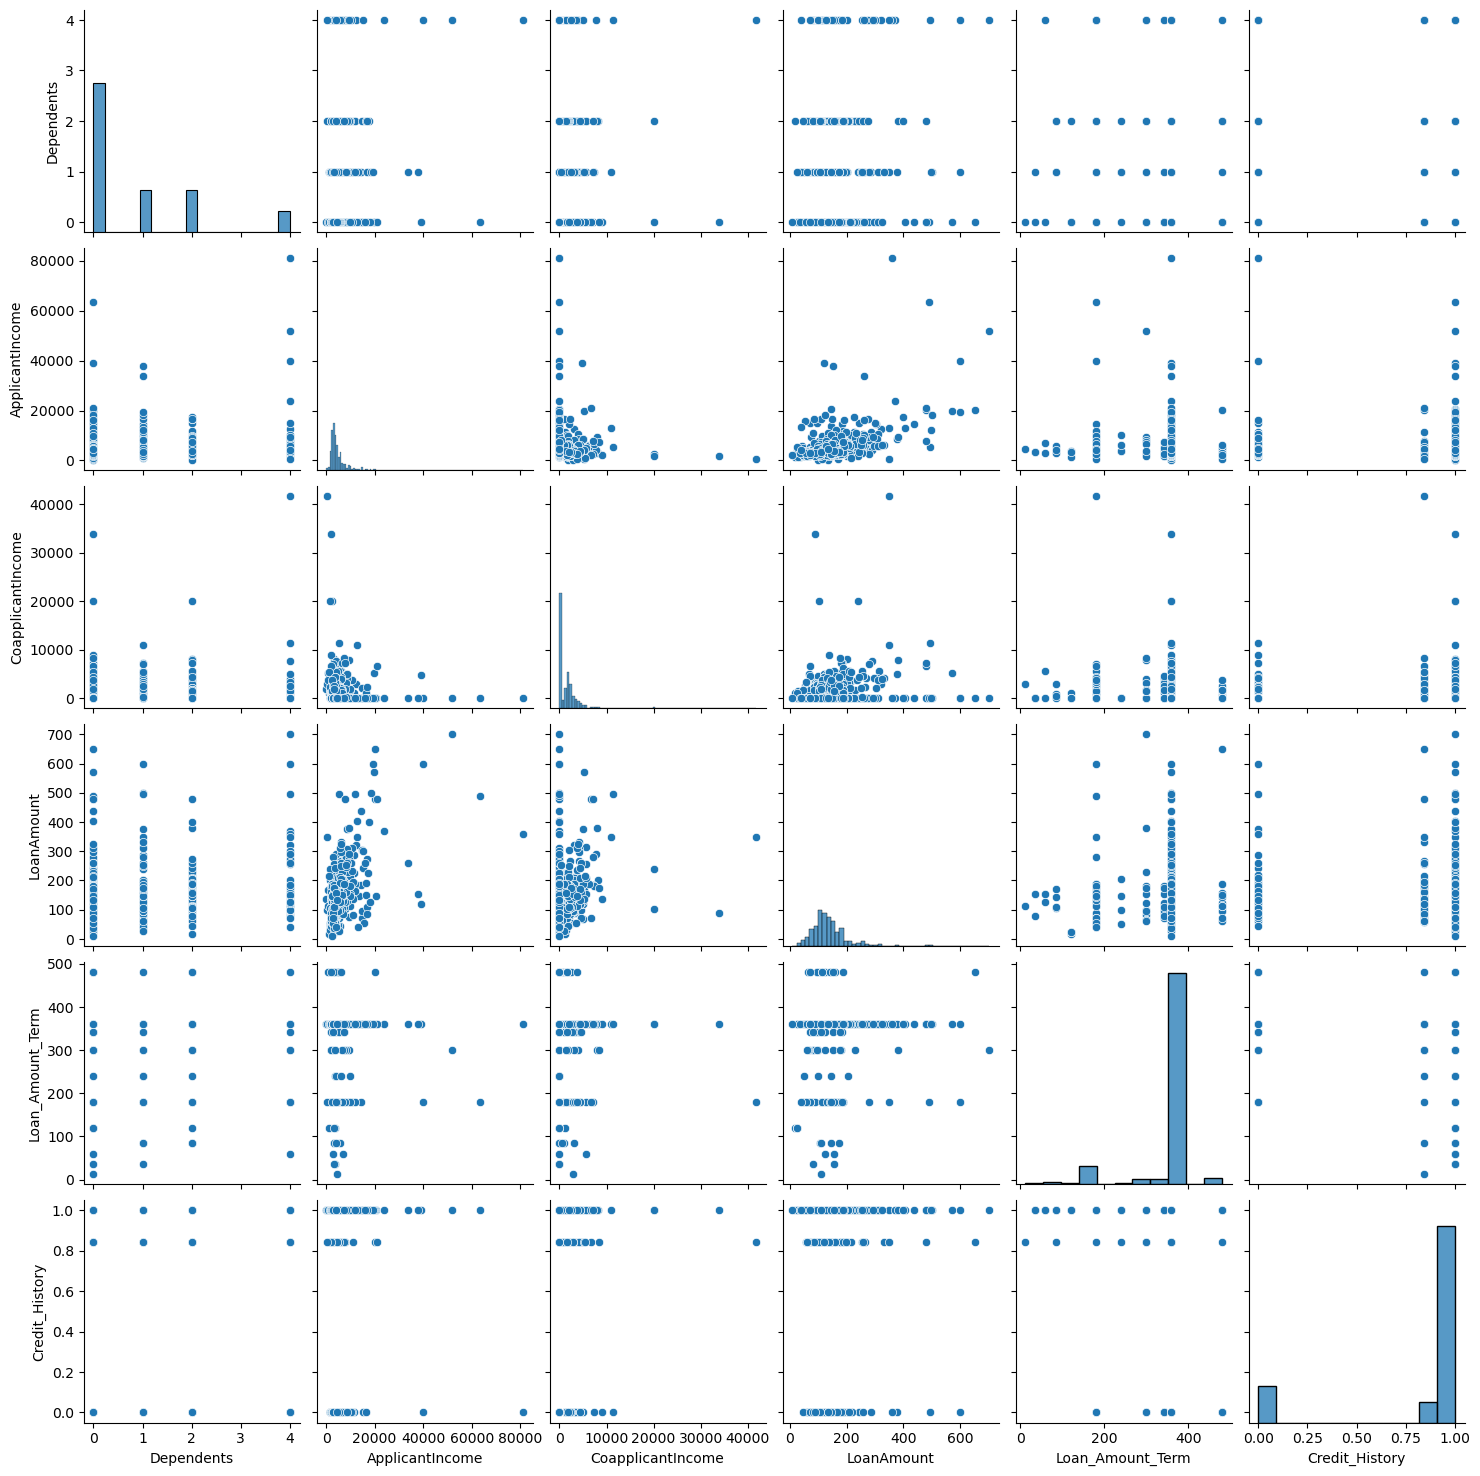

In [41]:
sns.pairplot(df)

### lets chek the outliersin box plot

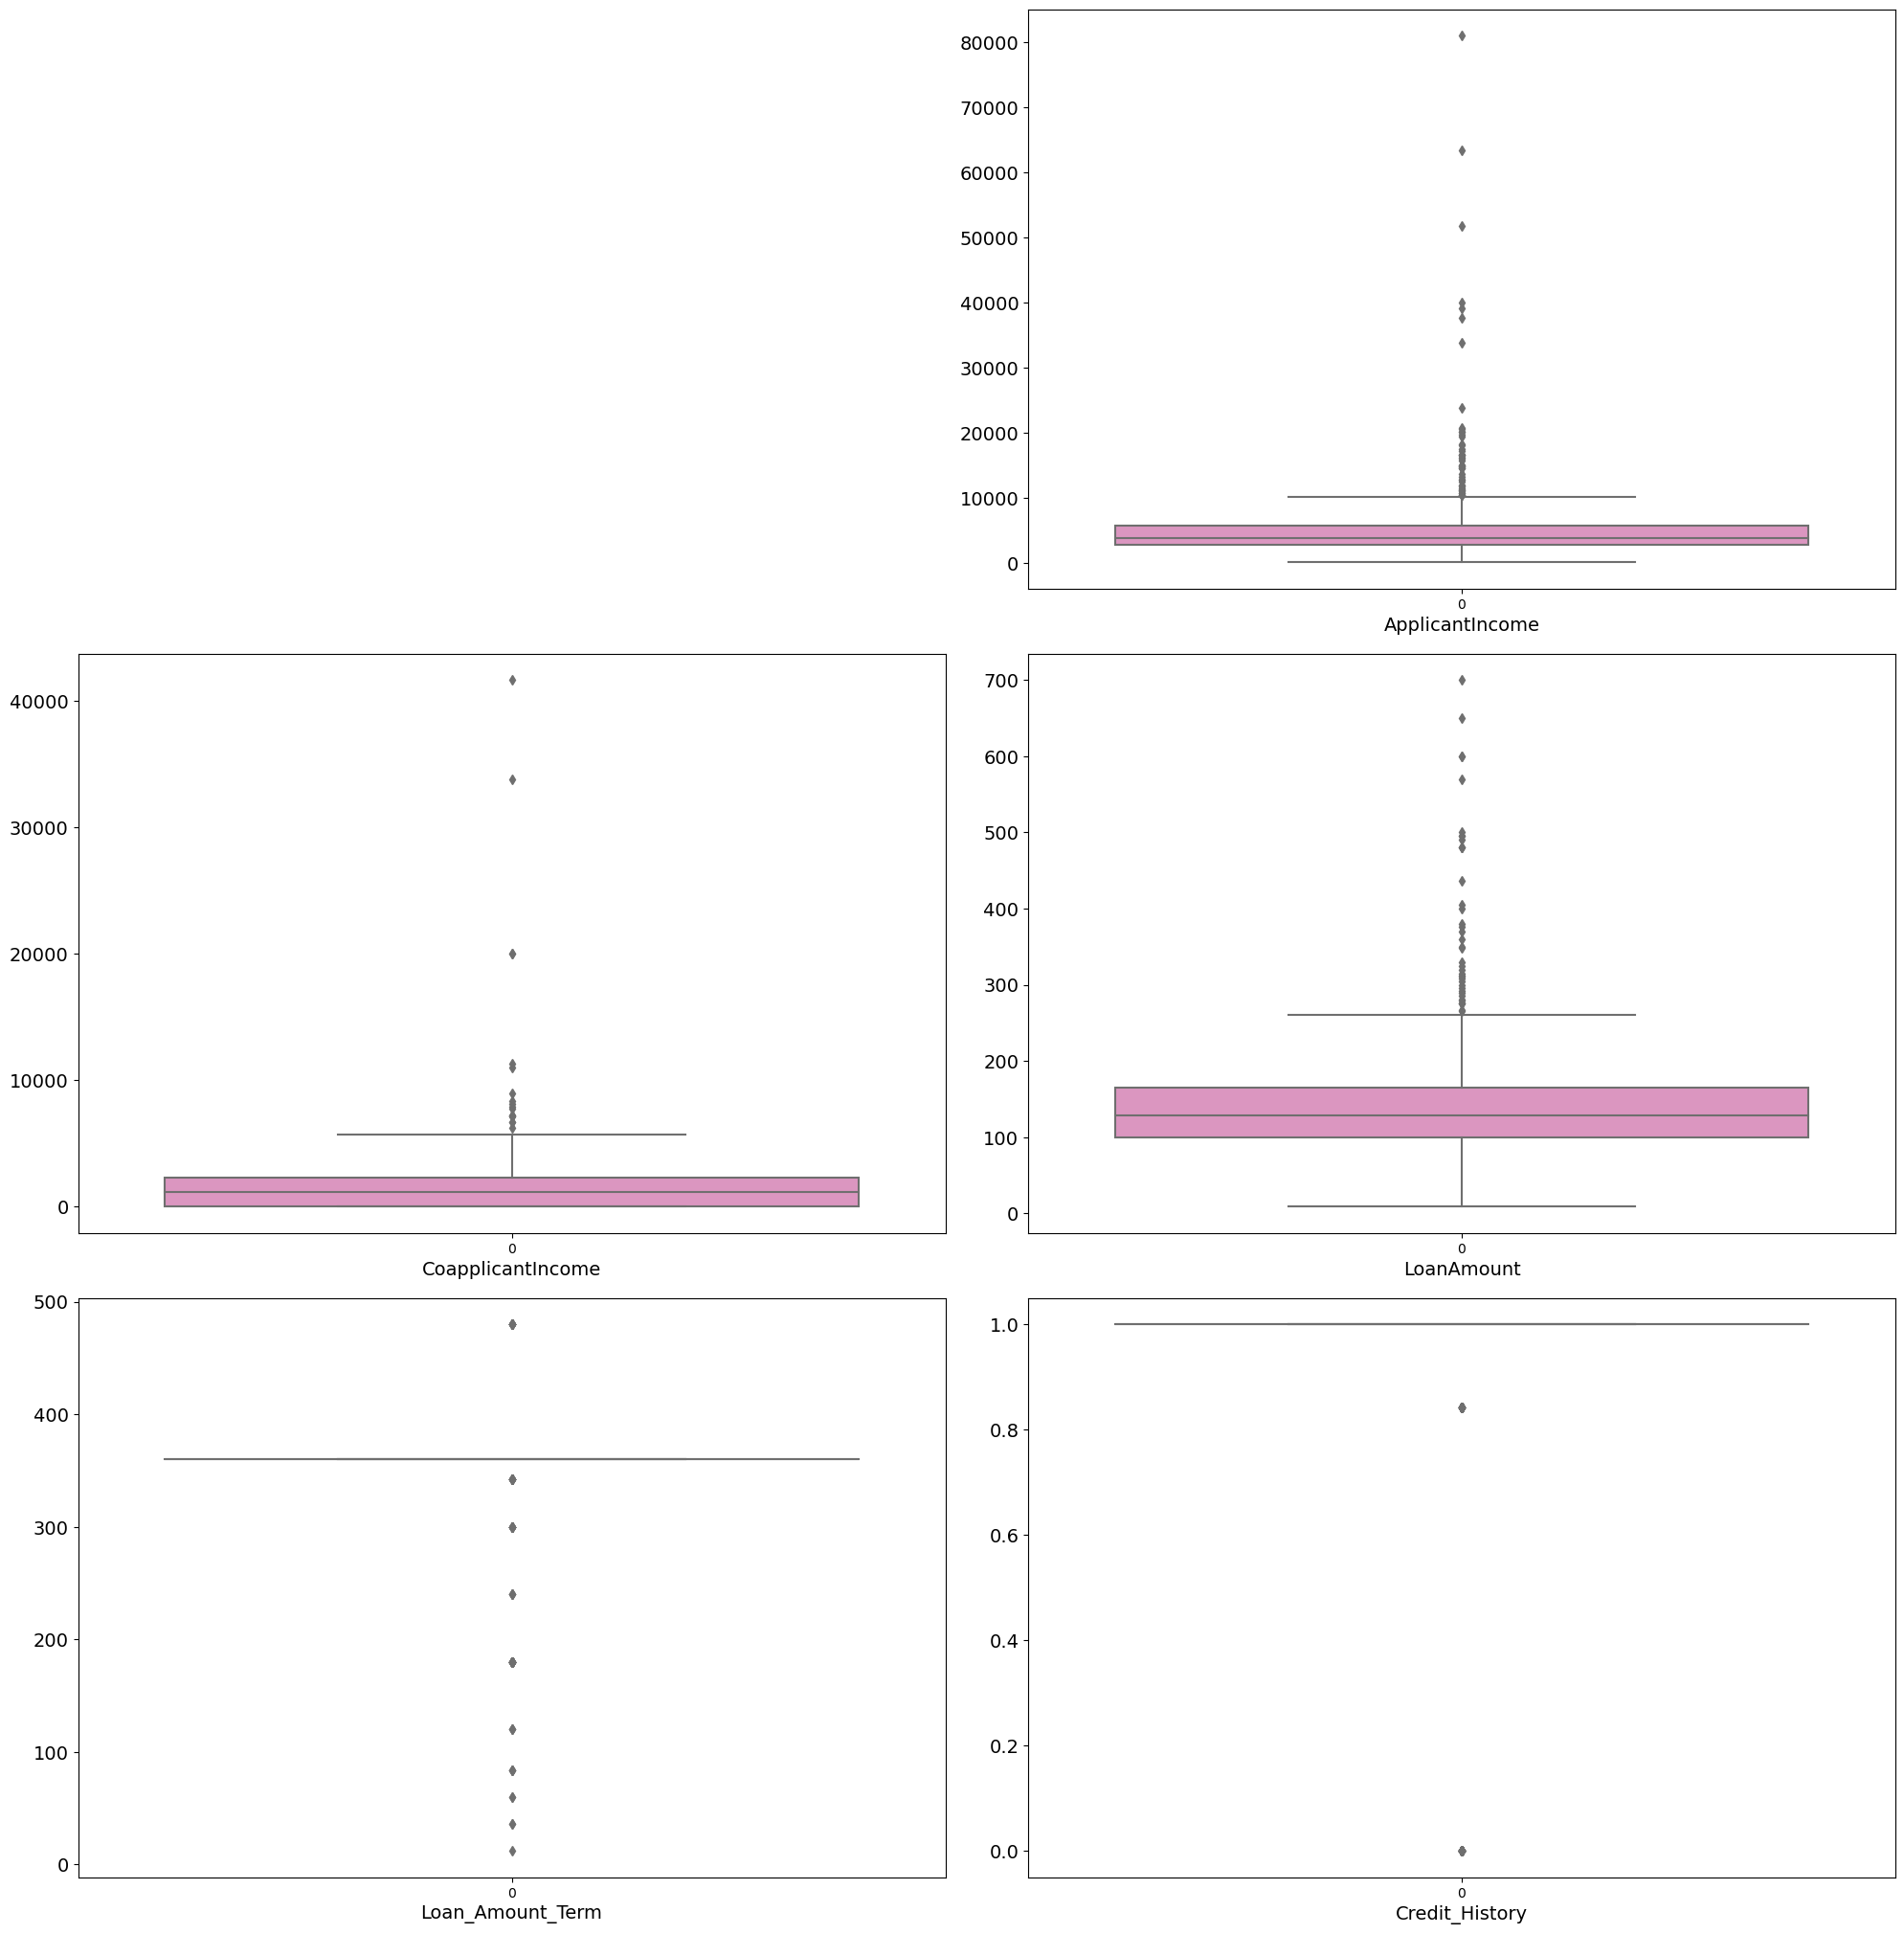

In [42]:
plt.figure(figsize=(20,40))
value=1
for col in df:
    if value <=12:
        if df.dtypes[col] == 'int64'or df.dtypes[col] == 'float64':
            g=plt.subplot(6,2,value)
            sns.boxplot(df[col],palette="Set2_r")
            plt.xlabel(col,fontsize=14)
            plt.yticks(rotation=0,fontsize=14)
    value+=1
plt.tight_layout()

### lets se outlies in detail¶

In [43]:
from scipy import stats
from scipy.stats import zscore

In [44]:
out_columns=df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
z_scor=np.abs(zscore(out_columns))

In [45]:
np.where(z_scor>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([1, 3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 1, 2, 0, 0, 3, 3, 2, 2, 3, 0, 2,
        2, 1, 0, 1, 2, 0, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2],
       dtype=int64))

In [46]:
df.iloc[9]

Gender                    Male
Married                    Yes
Dependents                   1
Education             Graduate
Self_Employed               No
ApplicantIncome          12841
CoapplicantIncome      10968.0
LoanAmount               349.0
Loan_Amount_Term         360.0
Credit_History             1.0
Property_Area        Semiurban
Loan_Status                  N
Name: 9, dtype: object

### we are kepping outlirs 

Dependents           1.456965
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

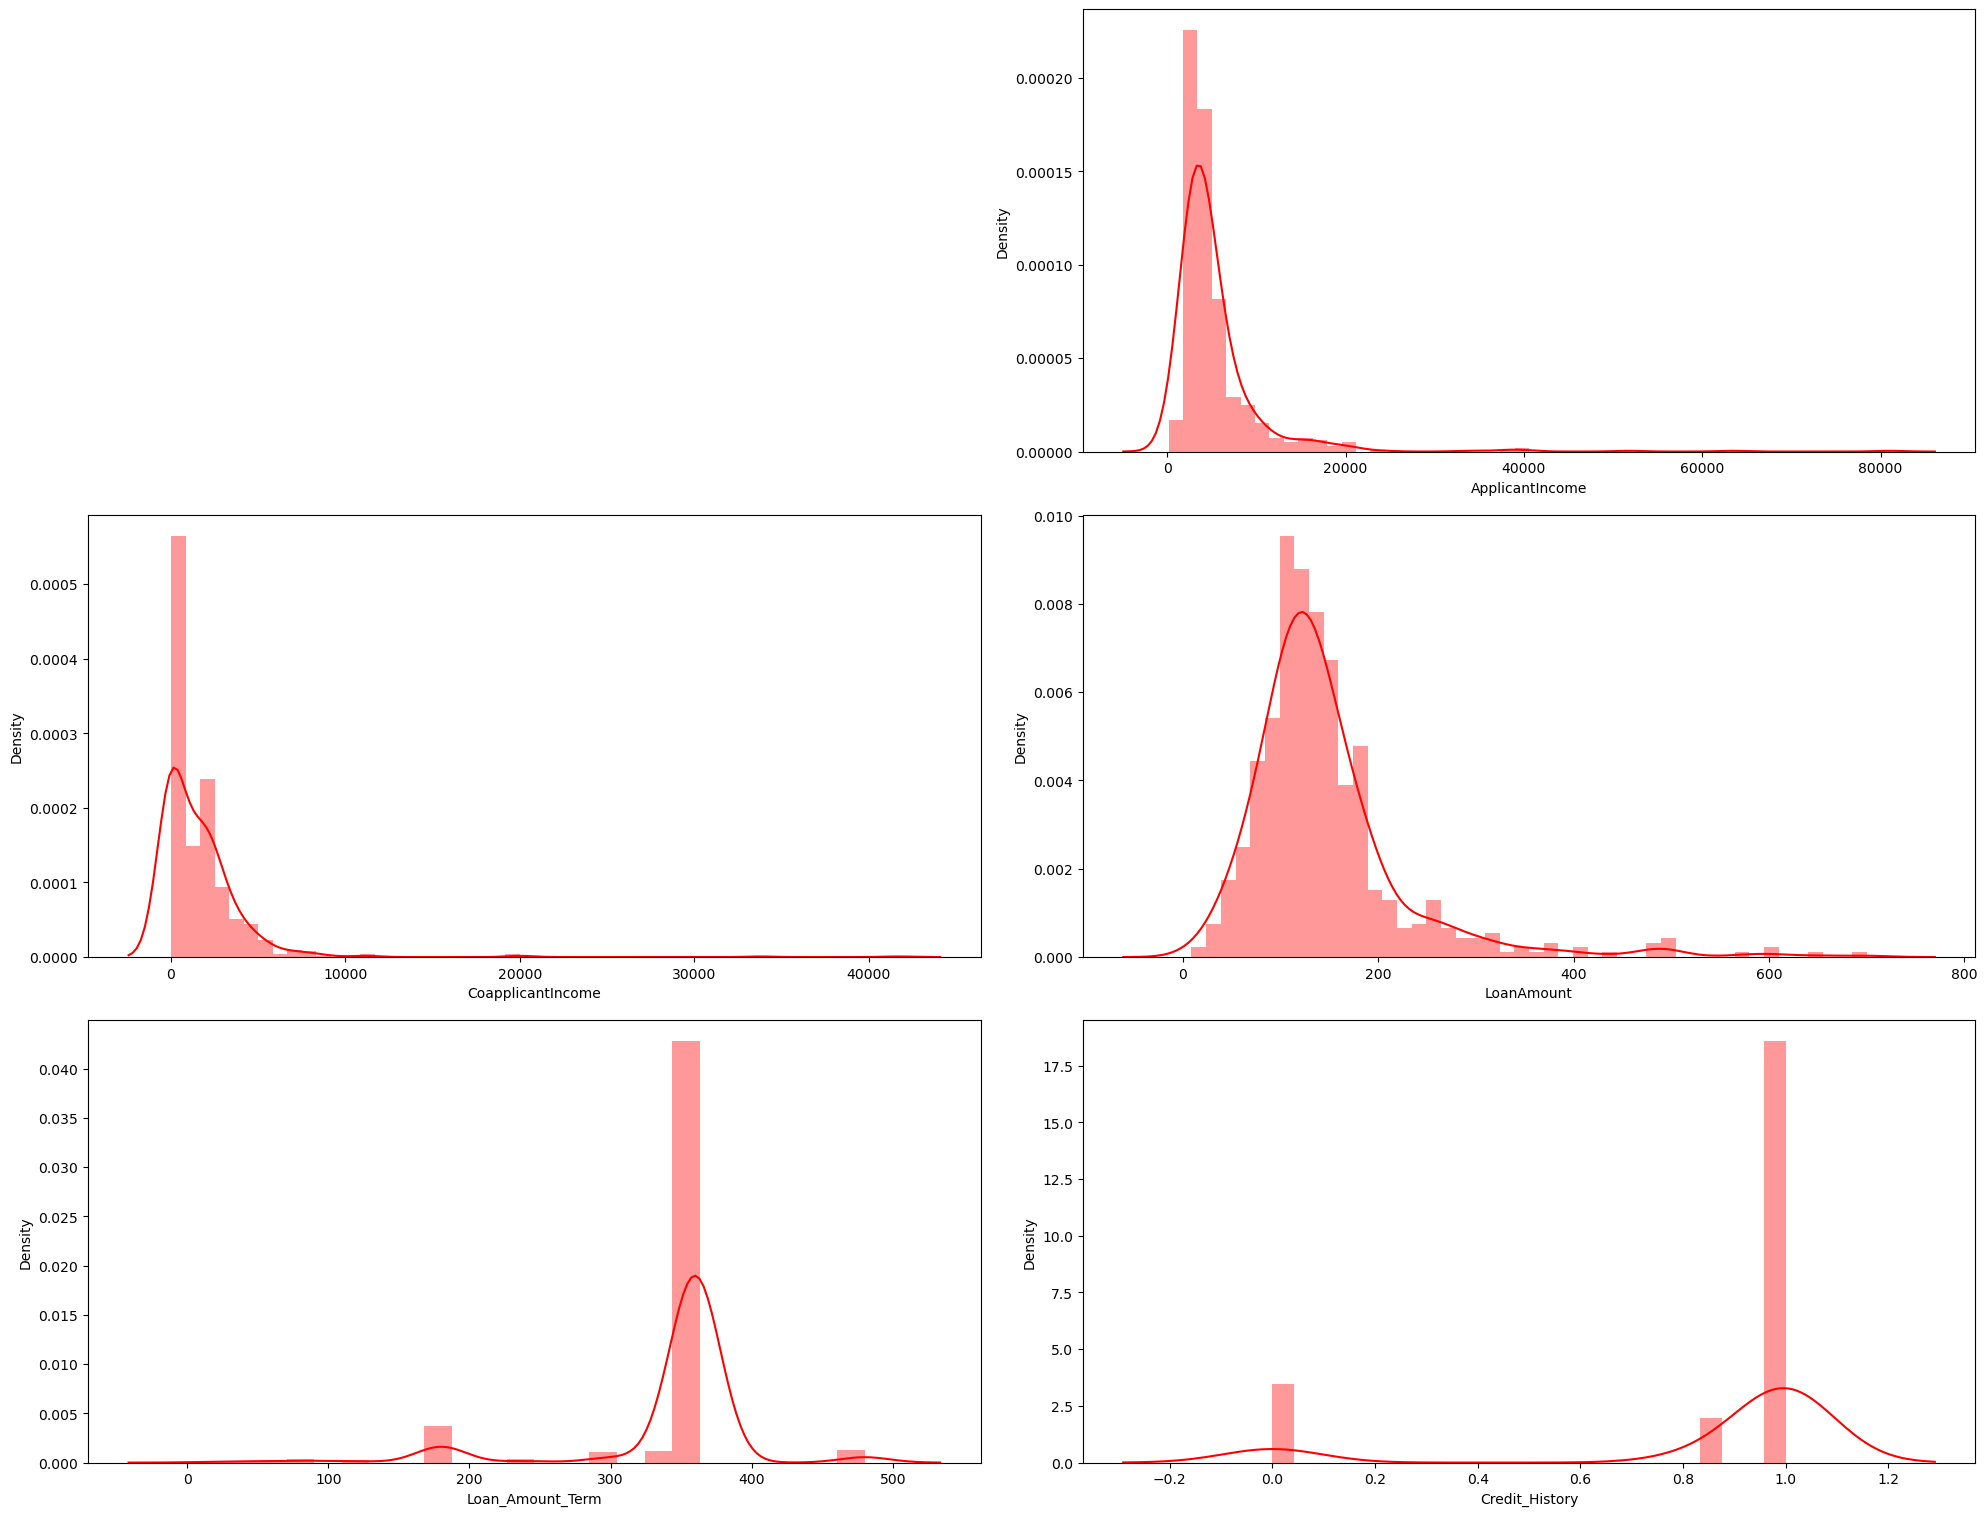

In [47]:
plt.figure(figsize=(20,30))
plot_v=1
for col in df:
    if plot_v <=12:
        if df.dtypes[col] == 'int64'or df.dtypes[col] == 'float64':
            p=plt.subplot(6,2,plot_v)
            sns.distplot(df[col],color='red')
            plt.xlabel(col,fontsize=10)
            plt.yticks(rotation=0,fontsize=10)
    plot_v+=1
plt.tight_layout() 
df.skew()

In [48]:
df['ApplicantIncome']=np.cbrt(df['ApplicantIncome'])
df['CoapplicantIncome']=np.cbrt(df['CoapplicantIncome'])
df['LoanAmount']=np.cbrt(df['LoanAmount']) # removing skewness with cube root(cbrt) methode
df['Loan_Amount_Term']=np.cbrt(df['Loan_Amount_Term'])

In [49]:
df.skew()

Dependents           1.456965
ApplicantIncome      2.083638
CoapplicantIncome    0.196726
LoanAmount           0.832841
Loan_Amount_Term    -3.573315
Credit_History      -1.963600
dtype: float64

### problem of skewness is resove 
### columns wich still have high skew value are catagorical data

## let chek if data has any multicolinearty issue.

In [50]:
df.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,1.000000,0.131689,-0.014257,0.167496,-0.090113,-0.044303
ApplicantIncome,0.131689,1.000000,-0.325066,0.555728,-0.022906,0.015212
CoapplicantIncome,-0.014257,-0.325066,1.000000,0.158113,-0.000552,-0.003044
LoanAmount,0.167496,0.555728,0.158113,1.000000,0.071865,-0.017384
Loan_Amount_Term,-0.090113,-0.022906,-0.000552,0.071865,1.000000,-0.003810
Credit_History,-0.044303,0.015212,-0.003044,-0.017384,-0.003810,1.000000


<Axes: >

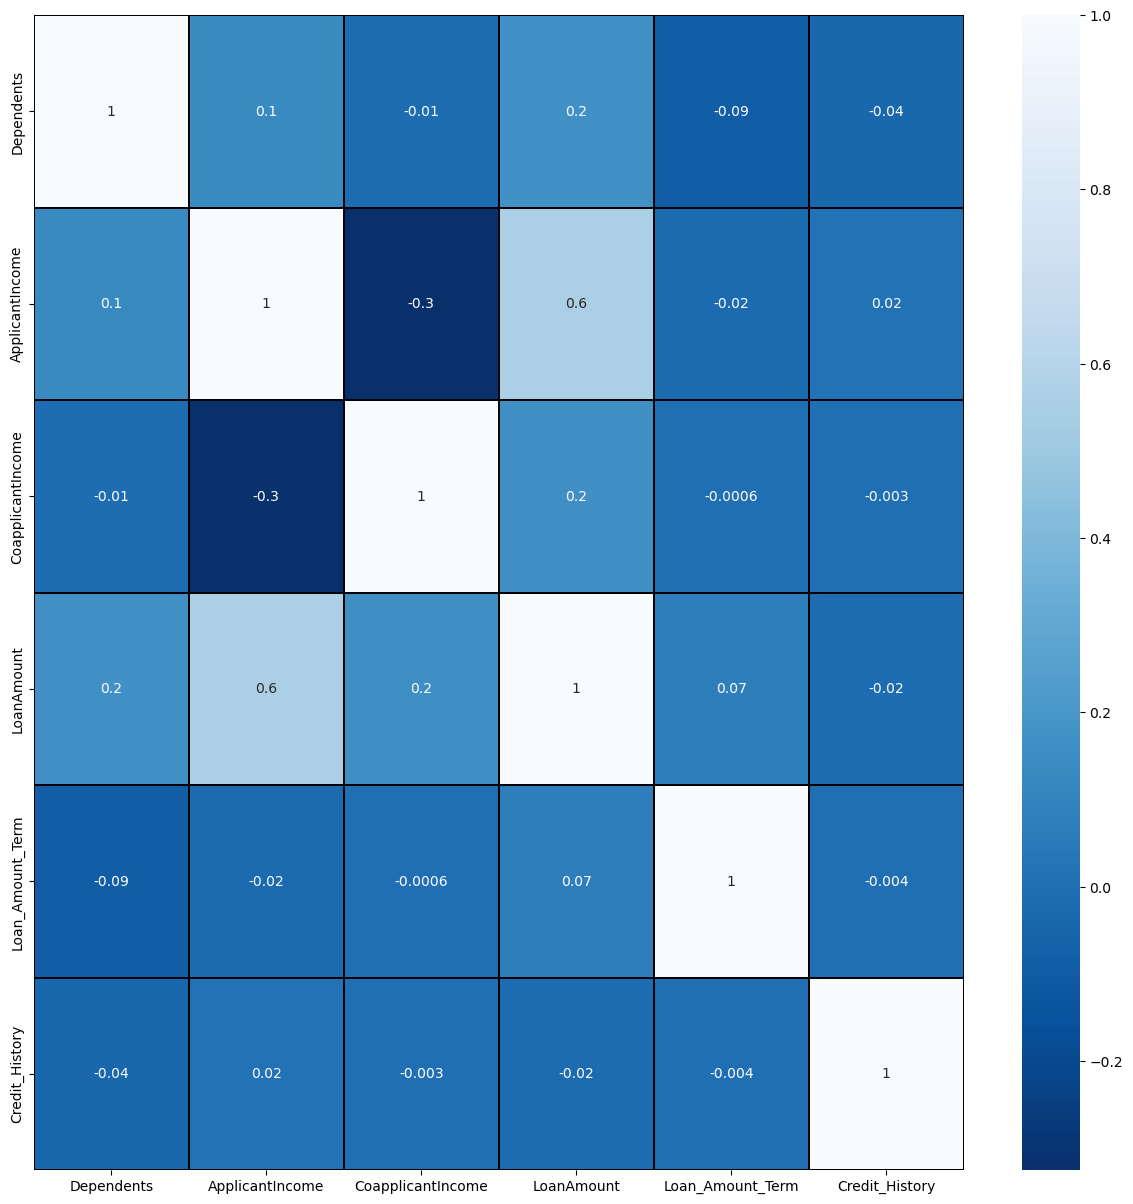

In [51]:
cor=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor,linewidths=0.1,fmt='.1g',linecolor='black',annot= True,cmap='Blues_r')

# obsarvation 
### ApplicantIncome column is highly negative correlated with CoapplicantIncome
### LoanAmount is highly positive correlated with ApplicantIncome
### othar columns don't have much correlation .

### lets encode the all columns wich have object data type

In [52]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [53]:
df['Gender']=label_encoder.fit_transform(df['Gender'])
df['Married']=label_encoder.fit_transform(df['Married'])
df['Education']=label_encoder.fit_transform(df['Education'])
df['Self_Employed']=label_encoder.fit_transform(df['Self_Employed'])
df['Property_Area']=label_encoder.fit_transform(df['Property_Area'])
df['Loan_Status']=label_encoder.fit_transform(df['Loan_Status'])

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(5), int32(7)
memory usage: 40.9 KB


### lets slit the data set

In [55]:
DFX=df.drop('Loan_Status', axis=1)
DFY=df['Loan_Status']

### NOW LETS REMOVE CLASSIMBALENCE FROM THE TARGET VARIABLE

In [56]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [57]:
DFX,DFY=sm.fit_resample(DFX,DFY)

<Axes: xlabel='Loan_Status', ylabel='count'>

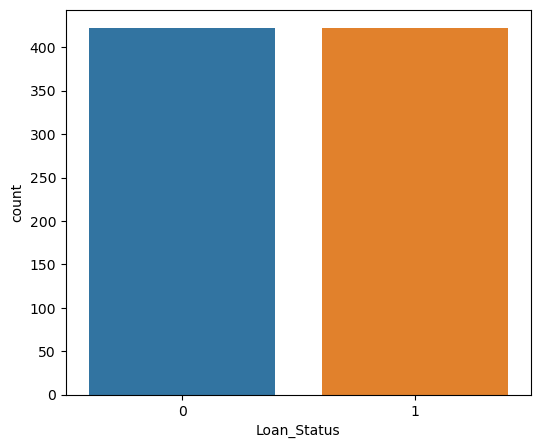

In [58]:
plt.figure(figsize=(6,5))
sns.countplot(x=DFY)

### problem of class embalence is resolve

In [59]:
DFY.shape

(844,)

In [60]:
DFX.shape

(844, 11)

### now lets scal the independent variable

In [61]:
from sklearn.preprocessing import StandardScaler
scal=StandardScaler()

In [62]:
DFX=pd.DataFrame(scal.fit_transform(DFX),columns=DFX.columns)

In [63]:
DFX.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,8.440000e+02,8.440000e+02,8.440000e+02,8.440000e+02,8.440000e+02,8.440000e+02,8.440000e+02,8.440000e+02,8.440000e+02,8.440000e+02,8.440000e+02
mean,-1.304907e-16,-3.367501e-17,3.998908e-17,8.418753e-18,2.525626e-17,5.924697e-16,7.155940e-17,1.241766e-16,-1.052344e-17,2.357251e-16,4.209376e-17
std,1.000593e+00,1.000593e+00,1.000593e+00,1.000593e+00,1.000593e+00,1.000593e+00,1.000593e+00,1.000593e+00,1.000593e+00,1.000593e+00,1.000593e+00
min,-2.078174e+00,-1.205607e+00,-6.534124e-01,-4.817850e-01,-3.390094e-01,-2.933183e+00,-1.021204e+00,-3.694623e+00,-8.590094e+00,-1.934646e+00,-1.240424e+00
25%,5.069091e-01,-1.205607e+00,-6.534124e-01,-4.817850e-01,-3.390094e-01,-5.810692e-01,-1.021204e+00,-5.813946e-01,2.656864e-01,-1.593550e-01,-1.240424e+00
50%,5.069091e-01,8.294577e-01,-6.534124e-01,-4.817850e-01,-3.390094e-01,-2.267963e-01,4.016983e-01,-8.750307e-02,2.656864e-01,6.071059e-01,2.549844e-02
75%,5.069091e-01,8.294577e-01,2.082752e-01,-4.817850e-01,-3.390094e-01,3.647121e-01,8.190176e-01,4.586323e-01,2.656864e-01,6.071059e-01,1.291421e+00
max,5.069091e-01,8.294577e-01,2.793338e+00,2.075615e+00,2.949771e+00,6.995656e+00,3.846885e+00,4.519378e+00,1.579910e+00,6.071059e-01,1.291421e+00


### lets import all the libreries for models

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [69]:
MAXXACU=0
MAXRS=0
for i in range(1,150):
    x_train,x_test,y_train,y_test=train_test_split(DFX,DFY,test_size=0.30,random_state=i)
    ler=DecisionTreeClassifier()
    ler.fit(x_train,y_train)
    pred=ler.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>MAXXACU:
        MAXXACU=acc
        MAXRS=i
print('MAX R2_score is-',MAXXACU,'BEST rendom state is',MAXRS)    

MAX R2_score is- 0.24027916251246262 BEST rendom state is 62


### now we get the best rendom state for aur data

In [70]:
x_train,x_test,y_train,y_test=train_test_split(DFX,DFY,test_size=0.30,random_state=MAXRS)

### we will use this value to build models

In [71]:
def evaluation(model, prediction, x_train, y_train, x_test, y_test):
    print(accuracy_score(y_test,prediction))
    print(confusion_matrix(y_test,prediction))
    print(classification_report(y_test,prediction))   # defing the all evaluation method to one

### making all modal as a singal modal

In [72]:
models = {
    'LogisticRegression'         : LogisticRegression(),
    'DecisionTreeClassifier'     : DecisionTreeClassifier(),
    'RandomForestClassifier'     : RandomForestClassifier(),
    'SVC'                        : SVC(),
    'KNeighborsClassifier'       : KNeighborsClassifier(),
    'GaussianNB'                 : GaussianNB(),
    'GradientBoostingClassifier' : GradientBoostingClassifier(),
    'MLPClassifier'              :MLPClassifier()
}

### now lets train all modal at once,¶

In [73]:
for model_name, model in models.items():
    model.fit(x_train, y_train)
    prediction1 = model.predict(x_test)
    print('Model: {}'.format(model_name))
    print(evaluation(model, prediction1, x_train, y_train, x_test, y_test), 
          '\n')

Model: LogisticRegression
0.7637795275590551
[[ 77  41]
 [ 19 117]]
              precision    recall  f1-score   support

           0       0.80      0.65      0.72       118
           1       0.74      0.86      0.80       136

    accuracy                           0.76       254
   macro avg       0.77      0.76      0.76       254
weighted avg       0.77      0.76      0.76       254

None 

Model: DecisionTreeClassifier
0.8188976377952756
[[ 99  19]
 [ 27 109]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       118
           1       0.85      0.80      0.83       136

    accuracy                           0.82       254
   macro avg       0.82      0.82      0.82       254
weighted avg       0.82      0.82      0.82       254

None 

Model: RandomForestClassifier
0.84251968503937
[[ 96  22]
 [ 18 118]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       118
           1 

## ALL MODEL SCORE:
## 'LogisticRegression'         :0.7637795275590551
##    'DecisionTreeClassifier'     :0.8188976377952756
##   'RandomForestClassifier'     :0.84251968503937
##    'SVC'                        :0.7598425196850394
##    'KNeighborsClassifier'       :0.7401574803149606
##    'GaussianNB'                 : 0.7559055118110236
##    'GradientBoostingClassifier' : 0.8110236220472441
##   'MLPClassifier'              :0.7755905511811023

### lets cross validate all models with cross_val_score method

In [74]:
for model_name, model in models.items():
    score=cross_val_score(model,DFX,DFY,cv=5)
    print('Model: {}'.format(model_name))
    print(score)
    print(model.score(x_test, y_test))
    print(score.mean())
    print("                                                                                  ")
    print('deffrence between accuracy_score and cross val_score',(model.score(x_test, y_test)) -(score.mean()))
    print("                                                                                  ")


Model: LogisticRegression
[0.69822485 0.68047337 0.73964497 0.80473373 0.77380952]
0.7637795275590551
0.7393772893772894
                                                                                  
deffrence between accuracy_score and cross val_score 0.02440223818176568
                                                                                  
Model: DecisionTreeClassifier
[0.68047337 0.71005917 0.81656805 0.77514793 0.79761905]
0.8188976377952756
0.7559735136658213
                                                                                  
deffrence between accuracy_score and cross val_score 0.06292412412945425
                                                                                  
Model: RandomForestClassifier
[0.73964497 0.73372781 0.84615385 0.84615385 0.86904762]
0.84251968503937
0.80694561848408
                                                                                  
deffrence between accuracy_score and cross val_score 0.03557406655529005

## the RandomForestClassifier model is best model for oour data¶
### its top performing modal with 84% accurecy 
### less deffrence in cross validation score {3%}

### now lets use hyper parameter tuning on our best model

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
parameters={
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}


In [77]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=4)
GCV.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [78]:
GCV.best_params_

{'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [79]:
final_model=RandomForestClassifier(max_depth=15,max_features='sqrt', min_samples_leaf= 2,min_samples_split=2,n_estimators= 100)
final_model.fit(x_train,y_train)
predf=final_model.predict(x_test)
accuracy=accuracy_score(y_test,predf)
accuracy*100

82.67716535433071

### we did get decrese in accuracy_score after using hyper parameter tuning.¶ {82.67%}

### lets chek the ROC curve

In [80]:
from sklearn import metrics

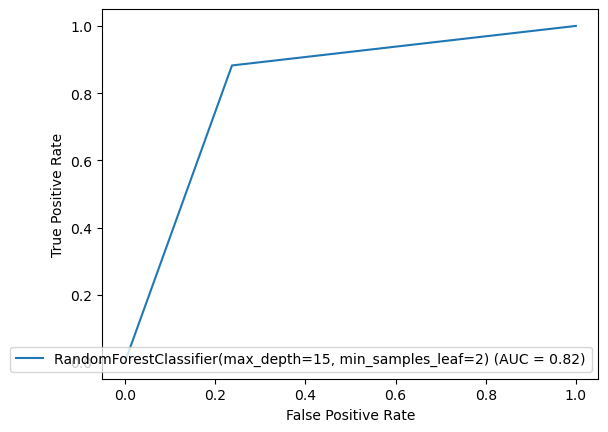

In [81]:
fpr,tpr,thresholds=metrics.roc_curve(y_test,predf)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

### lets save the modal¶

In [82]:
import joblib

In [83]:
joblib.dump(final_model,"Loan Application Status Prediction")

['Loan Application Status Prediction']